<a href="https://colab.research.google.com/github/swap-mitra/deep-learning/blob/main/Image_classification_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Author : Swapnil Mitra

### Dataset : https://www.cs.toronto.edu/~kriz/cifar.html

# Import

In [22]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import confusion_matrix, classification_report

%matplotlib inline

# Getting the Data

In [2]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

170500096/170498071 [==============================] - 6s 0us/step


In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

# Data Exploration

In [5]:
y_train = y_train.reshape(-1,)

In [6]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog',
           'horse', 'ship', 'truck']

In [7]:
def plot_sample(X, y, index):
  plt.figure(figsize=(15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

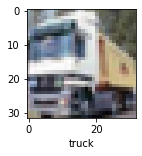

In [8]:
plot_sample(X_train, y_train, 1)

In [9]:
# Scaling

X_train = X_train / 255
X_test = X_test / 255

# Building the Model

In [10]:
cnn = models.Sequential([
      #cnn
      layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', 
                    input_shape=(32,32,3)),
      layers.MaxPooling2D((2,2)),

      layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', 
                    input_shape=(32,32,3)),
      layers.MaxPooling2D((2,2)),
      
      #dense
      layers.Flatten(),
      layers.Dense(64, activation='relu'),
      layers.Dense(10, activation='softmax')
])

In [12]:
cnn.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']) 

In [13]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 63s 40ms/step - loss: 1.4278 - accuracy: 0.4841
Epoch 2/10
1563/1563 [==============================] - 62s 40ms/step - loss: 1.0830 - accuracy: 0.6218
Epoch 3/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.9604 - accuracy: 0.6657
Epoch 4/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.8766 - accuracy: 0.6967
Epoch 5/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.8100 - accuracy: 0.7185
Epoch 6/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.7566 - accuracy: 0.7363
Epoch 7/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.7057 - accuracy: 0.7561
Epoch 8/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.6664 - accuracy: 0.7698
Epoch 9/10
1563/1563 [==============================] - 62s 39ms/step - loss: 0.6217 - accuracy: 0.7833
Epoch 10/10
1563/1563 [==============================] - 62s 40m

In [14]:
cnn.evaluate(X_test, y_test) 

313/313 [==============================] - 4s 12ms/step - loss: 0.9299 - accuracy: 0.7030


[0.9299445152282715, 0.703000009059906]

# Prediction

In [15]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[8.4394374e-04, 3.7081393e-06, 9.2098601e-03, 2.6364315e-01,
        4.5554296e-04, 7.0507956e-01, 1.9471090e-02, 2.0534497e-04,
        1.0413639e-03, 4.6413694e-05],
       [8.8529130e-05, 1.4734826e-02, 5.0077284e-07, 7.0522460e-10,
        1.5699952e-10, 7.4607098e-11, 2.2423641e-11, 2.0863322e-12,
        9.8516625e-01, 9.9046565e-06],
       [1.0690843e-02, 1.1159599e-02, 1.0976039e-03, 4.0340351e-04,
        8.5569081e-05, 1.8687162e-05, 1.8096298e-05, 1.4680568e-05,
        9.7606260e-01, 4.4890502e-04],
       [8.6334258e-01, 1.1521135e-04, 6.8722740e-02, 1.2688595e-03,
        5.6300091e-04, 5.5788246e-06, 6.5355066e-06, 5.8669255e-05,
        6.5870896e-02, 4.5964203e-05],
       [7.8269687e-07, 5.9492228e-04, 2.7364818e-03, 1.2302722e-03,
        8.5004643e-02, 1.3390591e-04, 9.1029662e-01, 9.4993072e-07,
        7.6571717e-07, 8.0572534e-07]], dtype=float32)

In [16]:
y_classes = [np.argmax(element) for element in y_pred] 
y_classes[:5]

[5, 8, 8, 0, 6]

In [18]:
y_test = y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

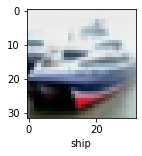

In [19]:
plot_sample(X_test, y_test, 1)

In [20]:
classes[y_classes[1]]

'ship'

In [23]:
print('Classification Report: \n', classification_report(y_test, y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.74      0.71      0.72      1000
           1       0.78      0.85      0.81      1000
           2       0.58      0.63      0.61      1000
           3       0.64      0.40      0.50      1000
           4       0.60      0.70      0.65      1000
           5       0.62      0.64      0.63      1000
           6       0.77      0.80      0.78      1000
           7       0.73      0.74      0.74      1000
           8       0.74      0.85      0.79      1000
           9       0.84      0.70      0.76      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.70     10000
weighted avg       0.70      0.70      0.70     10000

